In [7]:
import csv
import numpy as np

In [2]:
data = []
with open("./data/2016-03-21_2016-04-24.csv", "r") as inputf:
    reader = csv.reader(inputf)
    for line in reader:
        data.append(line)

In [4]:
print len(data)

3964314


In [23]:
latArray = np.array([float(i[2]) for i in data])
lngArray = np.array([float(i[3]) for i in data])

In [27]:
dtype = [("lat", float), ("lng", float)]
values = [(float(i[2]), float(i[3])) for i in data]
GPSArray = np.array(values, dtype= dtype)

In [102]:
values_filter = [(float(i[2]), float(i[3])) for i in data]
GPSArray_filter = np.array(values_filter, dtype= dtype)
sorted_lng_GPS_filter = np.sort(GPSArray_filter, order="lng")

In [115]:
#Sort lat:
sorted_lat_GPS = np.sort(GPSArray, order="lat")
#sort lng:
sorted_lng_GPS = np.sort(GPSArray, order="lng")

In [125]:
#Get threshold:
threshold = 4000
min_lat = sorted_lat_GPS[threshold][0]
max_lat = sorted_lat_GPS[-threshold:][0][0]
print min_lat
print max_lat
min_lng = sorted_lng_GPS[threshold][1]
max_lng = sorted_lng_GPS[-threshold:][0][1]
print min_lng
print max_lng

10.6423333333333
10.9663333333333
106.538833333333
106.825


In [124]:
#Save outline to file:
outline = np.concatenate((sorted_lat_GPS[0:threshold], sorted_lat_GPS[-threshold:], sorted_lng_GPS[0:threshold], sorted_lng_GPS[-threshold:]))
np.savetxt("GPS.csv", outline, delimiter=",", fmt='%1.7f')

In [127]:
#remove outline
data_filtered = []
for line in data:
    #check in area:
    c_lat = float(line[2])
    c_lng = float(line[3])
    if c_lat <= max_lat and c_lat >= min_lat and c_lng >= min_lng and c_lng <= max_lng:
        data_filtered.append(line)

In [130]:
print len(data) - len(data_filtered)

12853


In [76]:
print len(sorted_lat_GPS_1000)

3964314


In [105]:
import matplotlib.pyplot as plt

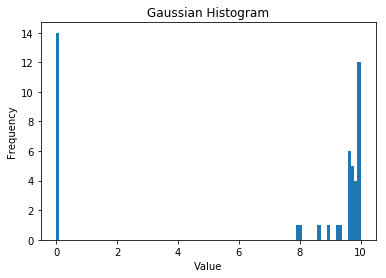

In [114]:
bins = np.linspace(0, 10, 100)

plt.hist(latArray, bins)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()